### Lab: Project #1, Part 3
#### Name: Rishi Rana
#### Date: 10/15/25
#### Purpose: Answer Data Questions and Preform MatPlotLib graphs to support findings

QUESTIONS:
How did the interest level (1-5) of taking more computing classes differ from the year 2020 and 2024?
What sources are most effective in making students aware and enroll in computing at CCM?
What are the top factors in students' decisions for enrollment (2020 vs 2024)?

##### **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Read CSV Files into variables

In [2]:
df24 = pd.read_csv('2024.csv')
df20 = pd.read_csv('2020.csv')

##### **Preform pandas functions on data files and output results**

In [ ]:
df24.describe()

In [ ]:
df24.columns

In [ ]:
df24.shape

In [ ]:
df24.dtypes

In [ ]:
df24.head()

In [ ]:
df24.tail()

In [ ]:
df24.sample()

In [ ]:
df24.info()

##### **Start to Clean Data**

###### **Clean 2024 Data by removing unused columns (used stackoverflow to find the startswith function aswell as the idea to iterate and delete repeated columns https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe)**

In [ ]:
df24 = df24.drop(['Gender', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?', 'Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.', 'Which course are you enrolled in?'], axis='columns')
df24 = df24.drop([col for col in df24.columns if col.startswith("Prior")], axis='columns')
df24 = df24.drop([col for col in df24.columns if col.startswith("What motivated")], axis='columns')
df24 = df24.drop([col for col in df24.columns if col.startswith("Did you recieve")], axis='columns')
df24 = df24.drop([col for col in df24.columns if col.startswith("Race/ethnicity")], axis='columns')

df20 = df20.drop(['Gender', 'Please explain your answer to the question above.  Why or why not would you be interested in taking another computing class?', 'Was a computing major/certificate your first choice, or did you change majors from a different CCM program? If you changed majors, indicate what your first major was.', 'Which course are you enrolled in?'], axis='columns')
df20 = df20.drop([col for col in df24.columns if col.startswith("Prior")], axis='columns')
df20 = df20.drop([col for col in df24.columns if col.startswith("What motivated")], axis='columns')
df20 = df20.drop([col for col in df24.columns if col.startswith("Did you recieve")], axis='columns')
df20 = df20.drop([col for col in df24.columns if col.startswith("Race/ethnicity")], axis='columns')

###### **Rename the columns to be shorter (Used Chat GPT to comeup with better names and effectively change everything)**

In [4]:
new_columns = {
    "How did you hear about County College of Morris? [CCM Web site]": "hear_ccm_website",
    "How did you hear about County College of Morris? [Social Media]": "hear_social_media",
    "How did you hear about County College of Morris? [Community Event]": "hear_community_event",
    "How did you hear about County College of Morris? [Family member or friend]": "hear_family_friend",
    "How did you hear about County College of Morris? [Current CCM student]": "hear_ccm_student",
    "How did you hear about County College of Morris? [CCM Alumni]": "hear_ccm_alumni",
    "How did you hear about County College of Morris? [High School Teacher]": "hear_hs_teacher",
    "How did you hear about County College of Morris? [High School Counselor]": "hear_hs_counselor",
    "How did you hear about County College of Morris? [In-app advertisement]": "hear_inapp_ad",
    "How did you hear about County College of Morris? [Employer]": "hear_employer",
    "How did you hear about County College of Morris? [Billboard]": "hear_billboard",
    "How did you hear about County College of Morris? [Television]": "hear_tv",
    "How did you hear about County College of Morris? [Radio]": "hear_radio",
    "How did you hear about County College of Morris? [Other]": "hear_other",
    "To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]": "impact_affordable_cost",
    "To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]": "impact_location",
    "To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]": "impact_program_choice",
    "To what extent did the following impact your decision to attend County College of Morris? [Online offerings]": "impact_online_offerings",
    "To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]": "impact_referral",
    "To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]": "impact_faculty_staff",
    "To what extent did the following impact your decision to attend County College of Morris? [College reputation]": "impact_reputation",
    "To what extent did the following impact your decision to attend County College of Morris? [Financial Aid]": "impact_financial_aid",
    "To what extent did the following impact your decision to attend County College of Morris? [Scholarships]": "impact_scholarships",
    "To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]": "impact_small_classes",
    "To what extent did the following impact your decision to attend County College of Morris? [Extra-curricular opportunities]": "impact_extracurricular",
    "To what extent did the following impact your decision to attend County College of Morris? [Accepted my transfer credits]": "impact_transfer_credits",
    "To what extent did the following impact your decision to attend County College of Morris? [Negative experience at another college]": "impact_negative_exp",
    "To what extent did the following impact your decision to attend County College of Morris? [NJ Stars Program]": "impact_njstars",
    "To what extent did the following impact your decision to attend County College of Morris? [Ability to transfer CCM credits to a 4-year school]": "impact_transferability",
    "To what extent did the following impact your decision to attend County College of Morris? [Get college credit while in high school]": "impact_hs_college_credit",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing class]": "exp_hs_class",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Middle/High school computing related club]": "exp_hs_club",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Computing-related competitions (e.g., Robotics competition, Lego competition, Cybersecurity, Programming)]": "exp_competition",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Afterschool computing-related camp/program]": "exp_afterschool_program",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Summer computing related camp/program]": "exp_summer_camp",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [An AP computing class]": "exp_ap_class",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [A dual enrollment computing class]": "exp_dual_enrollment",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend influence]": "exp_family_friend_influence",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Family or friend working in the computing field]": "exp_family_in_field",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [High school teacher or guidance counselor]": "exp_teacher_counselor",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Employer influence]": "exp_employer_influence",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Current CCM student]": "exp_ccm_student",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Experience at work]": "exp_work_experience",
    "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM? [Other]": "exp_other",
    "What degree program are you currently enrolled in?": "degree_program",
    "Did you receive information about the CCM computing programs from any of the following sources? [High school guidance counselor]": "source_hs_counselor",
    "Did you receive information about the CCM computing programs from any of the following sources? [High School Teacher]": "source_hs_teacher",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Information Technologies Website]": "source_it_website",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Admissions]": "source_admissions",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM advisor/counselor]": "source_advisor",
    "Did you receive information about the CCM computing programs from any of the following sources? [Employer]": "source_employer",
    "Did you receive information about the CCM computing programs from any of the following sources? [CCM Workforce Development]": "source_ccm_workforce",
    "Did you receive information about the CCM computing programs from any of the following sources? [NJ Workforce Development Program]": "source_nj_workforce",
    "Did you receive information about the CCM computing programs from any of the following sources? [Other]": "source_other",
    "On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you in taking more computing classes?": "interest_level",
    "Age": "age"
}
df24 = df24.rename(columns=new_columns)
df20 = df20.rename(columns=new_columns)

In [71]:
df20['interest_level'] = df20['interest_level'].astype('Int64')
df24['interest_level'] = df24['interest_level'].astype('Int64')

###### **Pandas Functions to see Changes**

In [ ]:
df24.head()

In [ ]:
df24.tail()

In [ ]:
df24.info()

In [ ]:
df24.shape

###### **Creating Clean CSV**

In [ ]:
df24.to_csv("2024-Cleaned.csv", index=False)

In [ ]:
df20.to_csv("2020-Cleaned.csv", index=False)

###### **Creating Graph** (First get all the columns of sources then count how many yes there are for each column; based on that number create a graph and display the top 3 results)
Source: https://stackoverflow.com/questions/57967761/how-to-sum-up-yes-and-no-into-a-total-quantity-using-matplotlib-pandas-python
https://www.w3schools.com/python/matplotlib_bars.asp
ChatGPT Landa

In [ ]:
# get columns
sourceColumns = [x for x in df24.columns if x.startswith('hear') or x.startswith('source')]

# count number of columns with a yes
sourceCounts = {}
for col in sourceColumns:
    count = 0
    for x in df24[col]:
        if str(x) == 'Yes':
            count += 1
    sourceCounts[col] = count

# CHATGPT FOR TOP 3 DICTIONARY (LAMBDA) sorting the diction and replacnig for easier plot
sortedSources = sorted(sourceCounts.items(), key=lambda item: item[1], reverse=True)

# get top 3
sortedSources = dict(sortedSources[:3])

# graph
plt.bar(sortedSources.keys(), sortedSources.values())
plt.ylabel('Number of Students')
plt.title('Top Most Effective Sources for Student Awareness of CCM')
plt.show()

##### What sources are most effective in making students aware of CCM?:

##### Family Friends, Highschool Counselors, and the CCM Website are the top sources inorder to make students aware of CCM.

###### **Creating Graph** (First get all the columns for d20 and d24 for the interest level then combine both dfs into a singular one and plot)
Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
https://www.w3schools.com/python/pandas/pandas_dataframes.asp
https://www.w3schools.com/python/matplotlib_bars.asp

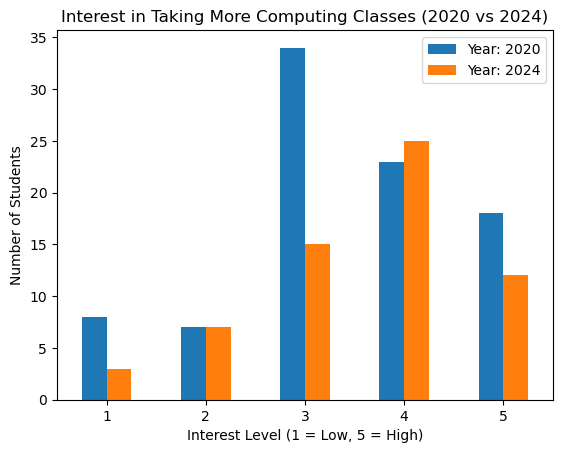

In [72]:
# get data 2020 and 2024 and combine values of interest level to vs
df = pd.DataFrame({
    'Year: 2020': df20['interest_level'].value_counts(),
    'Year: 2024': df24['interest_level'].value_counts()
})

# graph both based on interest
df.plot(kind='bar')
plt.xlabel('Interest Level (1 = Low, 5 = High)')
plt.xticks(rotation=0)
plt.ylabel('Number of Students')
plt.title('Interest in Taking More Computing Classes (2020 vs 2024)')
plt.show()

##### How did the interest level (1-5) of taking more computing classes differ from the year 2020 and 2024?

##### It seems like overall there is a decline in interest in computing classes. Even though there was a spike in level 3 in 2020 while in 2024 the spike was in 4, 2020 still had the highest number of 5 level entries. 

###### **Creating Graph** (First get all the columns of impact then count how many high impact there are for each column; based on that number create a graph and display the top 5 results) (vs graph comparing 2020 vs 2024)
sources:
https://stackoverflow.com/questions/19073683/how-to-fix-overlapping-annotations-text
ChatGPT Landa

In [ ]:
# get columns
impactCol = [c for c in df24.columns if c.startswith('impact')]

#empty dict
impact24 = {}
impact20 = {}

# get the sums of high impact in both of the df
for x in impactCol:
    impact24[x] = (df24[x] == 'High Impact').sum()
    
    if x in df20.columns:
        impact20[x] = (df20[x] == 'High Impact').sum()

# LAMBDA FROM CHATGPT FROM THE PREVIOUS QUESTION
top24 = dict(sorted(impact24.items(), key=lambda x: x[1], reverse=True)[:5])
top20 = {k: impact20.get(k, 0) for k in top24.keys()}

# Help from CHATGPT To fix the Overlap issue with graphs going ontop of eachother (([i - 0.2 for i in x])
x = range(len(top24))

#plot
plt.bar([i - 0.2 for i in x], top20.values(), width=0.4, label='2020')
plt.bar([i + 0.2 for i in x], top24.values(), width=0.4, label='2024')

plt.xticks(x, top24.keys(), rotation=15)
plt.ylabel('Number of Students')
plt.title('Top 5 Enrollment Factors (2020 vs 2024)')
plt.legend()
plt.show()


##### It seems like the overall most effective enrollment factors havnt changed from 2020 - 2024. The impact of these factors have decreased significantly in the year 2024. Could be because survey numbers in 2024 dropped